<a href="https://colab.research.google.com/github/jinInoue-rrr/colabo_causal_py/blob/main/causal_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pythonによる因果分析
### 因果推論・因果探索の実践入門
### 第1部 因果推論


#### 第1章 相関と因果の違い

##### 疑似相関のパターン

- パターン1: 逆の因果
- パターン2: 交絡(confounding)の存在
- パターン3: 合流点バイアス(colider)
  - 例えば、人間性得点($x$)とITスキルの得点($y$)の二次元のスコアの合計で合格/不合格を選抜することを考える。つまり、何らかの閾値Tよりも合計点が高いと選抜され($x + y > T$)、閾値T以下だと不合格で選抜されないという状況とする。ここで、xとyには相関がない($corr = 0$)と仮定すると、$x$と$y$の散布図において、合計が一定の閾値を超えたもののみを選抜すると、「選抜されたサブグループ」($y > -x + T$の領域を満たすグループ)のみの間においては、$x$と$y$の間に本来は存在しないはずの負の相関関係が見られる、というようなことが起こりうるということ。


In [6]:
#### pseudo_correlation

import random
import numpy as np

random.seed(1234)
np.random.seed(1234)

import scipy.stats
from numpy.random import randn

import matplotlib.pyplot as plt
%matplotlib inline

# 追加

import seaborn as sns
import pandas as pd

In [7]:
num_data = 200

e_z = randn(num_data)
e_y = randn(num_data)

Z = e_z
Y = 2 * Z + e_y

# arrayからdicにしてdataframeに突っ込む

df = pd.DataFrame({"Z":Z, "Y":Y})


In [13]:
print(df)

            Z         Y
0    0.471435  0.623309
1   -1.190976 -3.001944
2    1.432707  3.022412
3   -0.312652 -1.196759
4   -0.720589 -0.383544
..        ...       ...
195 -0.431550 -0.814835
196 -0.161137 -0.260285
197  0.889157  0.750799
198  0.288377  0.338418
199 -1.051539 -0.170900

[200 rows x 2 columns]


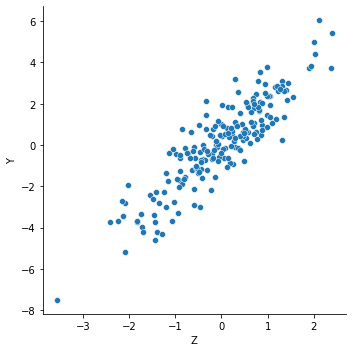

In [14]:
# seabornでの可視化

sns.relplot(x = "Z", y = "Y", data = df)# Z→Yの因果効果がある場合のプロット

In [15]:
# 相関係数の算出

np.corrcoef(Z, Y)# 0.89と強い



array([[1.        , 0.89379611],
       [0.89379611, 1.        ]])

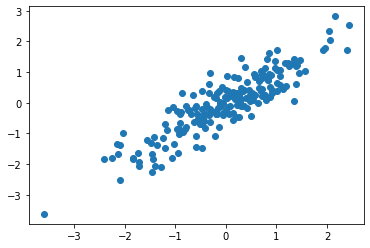

In [16]:
# 標準化とmatplotlibによる可視化

Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

plt.scatter(Z_std, Y_std)


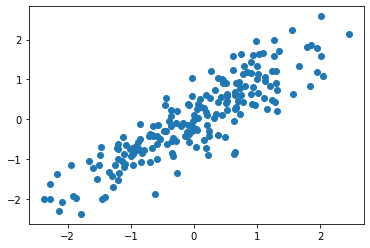

In [19]:
# 1. 疑似相関：逆の因果

num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

Y = e_y
Z = 2 * Y + e_z# Y→Zの因果としてシミュレーション

np.corrcoef(Y, Z)# .90の強い正の相関

Y_std = scipy.stats.zscore(Y)
Z_std = scipy.stats.zscore(Z)

plt.scatter(Z_std, Y_std)#DGP的な因果はY→Zだとしても、Z→Yでの散布図と表面上は区別がつかない


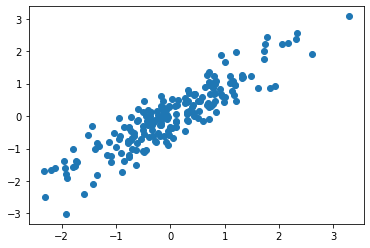

In [21]:
# 2. 疑似相関：共通の原因（交絡）

num_data = 200

e_x = randn(num_data)
e_z = randn(num_data)
e_y = randn(num_data)

# Z ← X → Y：ZとYの間にはarrowが存在しないが、Xが交絡因子になっているケースのDGP

Z = 3.3 * e_x + e_z
Y = 3.3 * e_x + e_y

np.corrcoef(Z, Y)

Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

plt.scatter(Z_std, Y_std)# DGP的にはZとYの間には因果関係はないが、交絡によって見せかけの相関が生じているケース


array([[ 1.        , -0.07684307],
       [-0.07684307,  1.        ]])

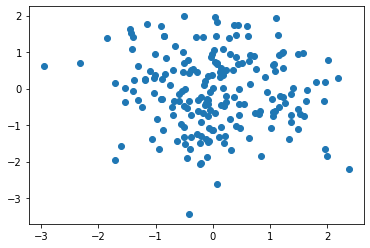

In [24]:
# 3. 疑似相関：合流点(collider)での選抜

num_data = 200

e_x = randn(num_data)
e_y = randn(num_data)

x = e_x
y = e_y

plt.scatter(x, y)#iidなので当然独立

np.corrcoef(x, y)


array([[ 1.        , -0.60165455],
       [-0.60165455,  1.        ]])

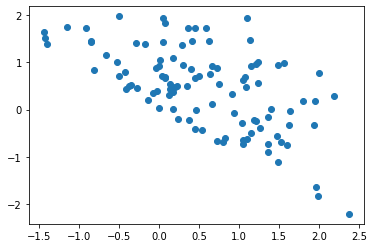

In [27]:
# 合流点による選抜

z = x + y

x_new = np.array([])
y_new = np.array([])

for i in range(num_data):
  if z[i] > 0.0:
    x_new = np.append(x_new, x[i])
    y_new = np.append(y_new, y[i])

plt.scatter(x_new, y_new)

np.corrcoef(x_new, y_new)


#### 第2章　因果効果の種類を把握しよう
